In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress, pearsonr

import requests
import gmaps
from pprint import pprint
from scipy.stats import boxcox

from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

data = pd.read_csv("Resources/H1N1_dataset.csv")
data.head()


,Date,Country,Cumulative no. of cases,Cumulative no. of deaths,Link
0,2009-04-24,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
1,2009-04-24,United States of America,7,0,https://www.who.int/csr/don/2009_04_24/en/
2,2009-04-26,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
3,2009-04-26,United States of America,20,0,https://www.who.int/csr/don/2009_04_24/en/
4,2009-04-27,Canada,6,0,https://www.who.int/csr/don/2009_04_24/en/


In [2]:
data_df = data[["Date", "Country", "Cumulative no. of cases", "Cumulative no. of deaths"]]
data_df

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths
0,2009-04-24,Mexico,18,0
1,2009-04-24,United States of America,7,0
2,2009-04-26,Mexico,18,0
3,2009-04-26,United States of America,20,0
4,2009-04-27,Canada,6,0
...,...,...,...,...
2485,2009-07-06,Venezuela,206,0
2486,2009-07-06,Viet Nam,181,0
2487,2009-07-06,Virgin Islands,1,0
2488,2009-07-06,West Bank and Gaza Strip,60,0


In [3]:
len(data_df.Country.unique())

148

In [4]:
data_df = data_df.rename(columns={"Cumulative no. of cases": "Total Cases", "Cumulative no. of deaths": "Total Deaths"})
data_df

,Date,Country,Total Cases,Total Deaths
0,2009-04-24,Mexico,18,0
1,2009-04-24,United States of America,7,0
2,2009-04-26,Mexico,18,0
3,2009-04-26,United States of America,20,0
4,2009-04-27,Canada,6,0
...,...,...,...,...
2485,2009-07-06,Venezuela,206,0
2486,2009-07-06,Viet Nam,181,0
2487,2009-07-06,Virgin Islands,1,0
2488,2009-07-06,West Bank and Gaza Strip,60,0


In [5]:
date_df = data_df.groupby('Country')['Date'].agg(['min','max']).rename(columns={'min':'first','max':'last'})
date_df

,first,last
Country,,
Algeria,2009-06-22,2009-07-06
Antigua and Barbuda,2009-06-24,2009-07-06
Argentina,2009-05-09,2009-07-06
Australia,2009-05-09,2009-07-06
Austria,2009-04-29,2009-07-06
...,...,...
Venezuela,2009-06-01,2009-07-06
Viet Nam,2009-06-01,2009-07-06
Virgin Islands,2009-07-06,2009-07-06


In [6]:
data_df["Date"] = pd.to_datetime(data_df["Date"])

In [7]:
total_df = data_df.loc[data_df.groupby('Country').Date.idxmax()]
total_df


,Date,Country,Total Cases,Total Deaths
2355,2009-07-06,Algeria,5,0
2356,2009-07-06,Antigua and Barbuda,2,0
2357,2009-07-06,Argentina,2485,60
2358,2009-07-06,Australia,5298,10
2359,2009-07-06,Austria,19,0
...,...,...,...,...
2485,2009-07-06,Venezuela,206,0
2486,2009-07-06,Viet Nam,181,0
2487,2009-07-06,Virgin Islands,1,0
2488,2009-07-06,West Bank and Gaza Strip,60,0


(0.8932259236040596, 1.5174056966476106e-52)


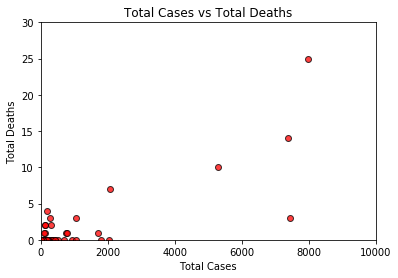

In [8]:
plt.ylim(0, 30)
plt.xlim(0, 10000)
plt.scatter(total_df["Total Cases"], total_df["Total Deaths"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
coefficient = pearsonr(total_df["Total Cases"], total_df["Total Deaths"])
plt.title("Total Cases vs Total Deaths")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
print(coefficient)
plt.savefig('output/h1n1_fig1')

In [9]:
sum_death = total_df["Total Deaths"].sum()
sum_total = total_df["Total Cases"].sum()
print(f"Global total deaths: {sum_death}")
print(f"Global total cases: {sum_total}")

Global total deaths: 429
Global total cases: 94577


Death rate: 0.004535986550641276


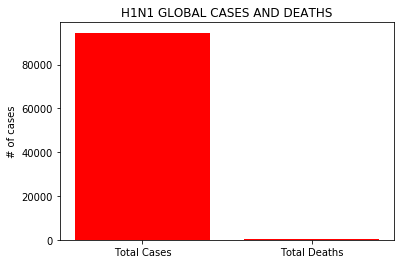

In [10]:
global_total = total_df["Total Cases"].sum ()
global_death = total_df["Total Deaths"].sum()

global_data = [global_total, global_death]

xaxis = np.arange(len(global_data))

plt.bar(xaxis, global_data, color='r', alpha=1, align="center", tick_label=("Total Cases", "Total Deaths"))
plt.title("H1N1 GLOBAL CASES AND DEATHS")
plt.ylabel("# of cases")
plt.savefig('output/h1n1_fig2')

print(f"Death rate: {global_death/global_total}")

In [11]:
sorted_total_df = total_df.sort_values(by=['Total Cases'], ascending=False)
top_10 = sorted_total_df.iloc[0:10,:]
top_10


,Date,Country,Total Cases,Total Deaths
2482,2009-07-06,United States of America,33902,170
2431,2009-07-06,Mexico,10262,119
2373,2009-07-06,Canada,7983,25
2481,2009-07-06,United Kingdom,7447,3
2376,2009-07-06,Chile,7376,14
2358,2009-07-06,Australia,5298,10
2357,2009-07-06,Argentina,2485,60
2473,2009-07-06,Thailand,2076,7
2377,2009-07-06,China,2040,0
2416,2009-07-06,Japan,1790,0


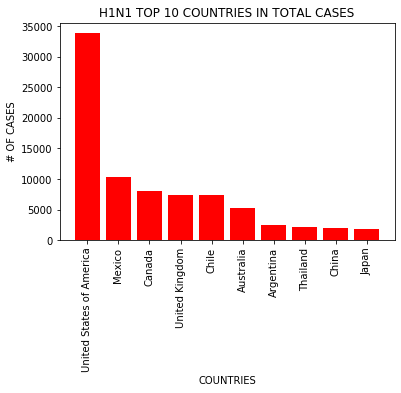

In [12]:
countries_10 = top_10["Country"]
total_cases_10 = top_10["Total Cases"]

plt.bar(countries_10, total_cases_10, color='r', alpha=1, align="center")
plt.xticks(rotation='vertical')
plt.title("H1N1 TOP 10 COUNTRIES IN TOTAL CASES")
plt.xlabel("COUNTRIES")
plt.ylabel("# OF CASES")
plt.savefig('output/h1n1_fig3')


In [13]:
sorted_death_df = total_df.sort_values(by=['Total Deaths'], ascending=False)
top_10_deaths = sorted_death_df.iloc[0:10,:]
top_10_deaths

,Date,Country,Total Cases,Total Deaths
2482,2009-07-06,United States of America,33902,170
2431,2009-07-06,Mexico,10262,119
2357,2009-07-06,Argentina,2485,60
2373,2009-07-06,Canada,7983,25
2376,2009-07-06,Chile,7376,14
2358,2009-07-06,Australia,5298,10
2473,2009-07-06,Thailand,2076,7
2483,2009-07-06,Uruguay,195,4
2481,2009-07-06,United Kingdom,7447,3
2380,2009-07-06,Costa Rica,277,3


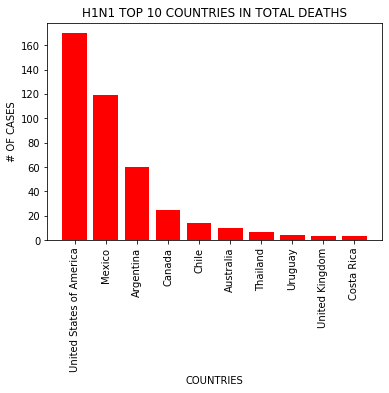

In [14]:
countries_deaths_10 = top_10_deaths["Country"]
total_deaths_10 = top_10_deaths["Total Deaths"]
total_cases_10_2 = top_10_deaths["Total Cases"]

# indx = np.arange(len(countries_deaths_10))

# bar_width = 0.25

# fig, ax = plt.subplots()
# bar_total = ax.bar(indx-bar_width/2, total_deaths_10, bar_width, label="Top 10 deaths")
# bar_death = ax.bar(indx+bar_width/2, total_cases_10_2, bar_width, label="Top 10 total")

plt.bar(countries_deaths_10, total_deaths_10, color='r', alpha=1, align="center")
plt.xticks(rotation='vertical')
plt.title("H1N1 TOP 10 COUNTRIES IN TOTAL DEATHS")
plt.xlabel("COUNTRIES")
plt.ylabel("# OF CASES")
plt.savefig('output/h1n1_fig4')


In [15]:
population1 = data_df[data_df["Country"] == "Mexico"]
population1["Total Cases"].mean()

3722.12

In [16]:
population2 = data_df[data_df["Country"] == "United States of America"]
population2["Total Cases"].mean()

8370.64

F_onewayResult(statistic=17.152531689789846, pvalue=3.1696378474235495e-12)


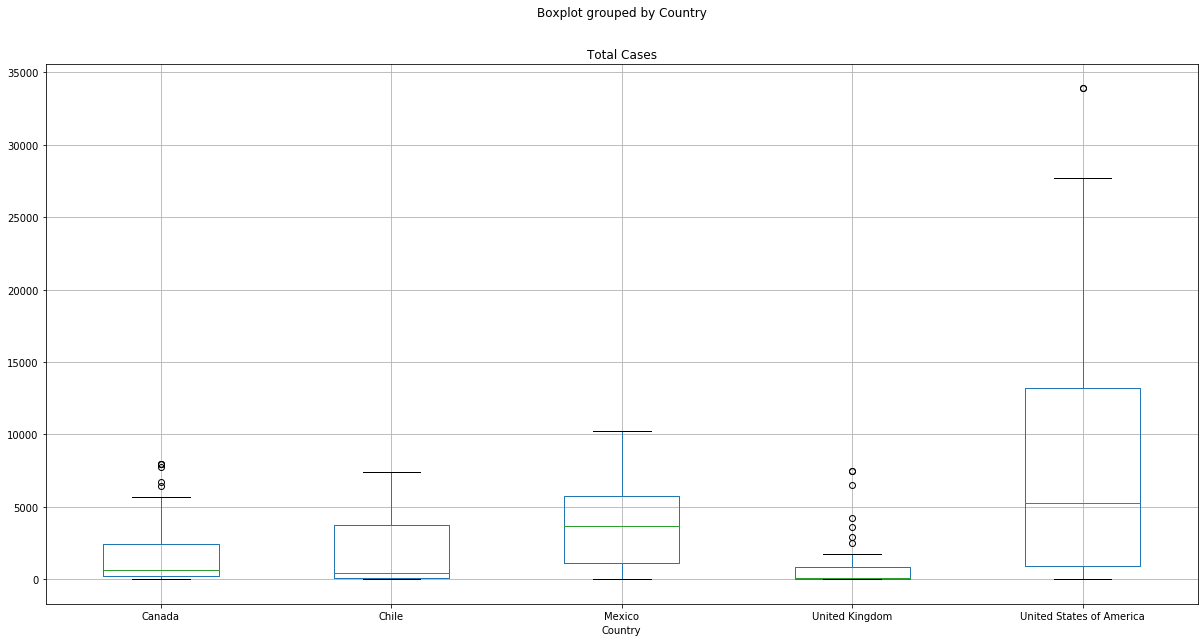

In [17]:
US = data_df.loc[data_df["Country"] == "United States of America"]["Total Cases"]
mexico = data_df.loc[data_df["Country"] == "Mexico"]["Total Cases"]
canada = data_df.loc[data_df["Country"] == "Canada"]["Total Cases"]
UK = data_df.loc[data_df["Country"] == "United Kingdom"]["Total Cases"]
chile = data_df.loc[data_df["Country"] == "Chile"]["Total Cases"]

print(stats.f_oneway(US, mexico, canada, UK, chile))

countries_boxplot = data_df.loc[(data_df["Country"] == "United States of America") | (data_df["Country"] == "Mexico") |
                                (data_df["Country"] == "Canada") | (data_df["Country"] == "United Kingdom") |
                                (data_df["Country"] == "Chile")]

countries_boxplot.boxplot("Total Cases", by="Country", figsize=(20, 10))







In [18]:
population = data_df["Total Cases"]
sample = data_df[data_df["Country"] == "United States of America"]
stats.ttest_1samp(sample["Total Cases"], population.mean())


Ttest_1sampResult(statistic=6.122546150825157, pvalue=1.5147177084520712e-07)

In [19]:
grouped_data = data_df.groupby("Date").sum()
grouped_data_df = grouped_data.reset_index()
grouped_data_df["Month"] = pd.DatetimeIndex(grouped_data_df['Date']).month
month_data_df = grouped_data_df.groupby("Month").sum()
month_data_df = month_data_df.reset_index()
month_data_df

,Month,Total Cases,Total Deaths
0,4,647,30
1,5,183180,1637
2,6,527905,2479
3,7,261451,1143


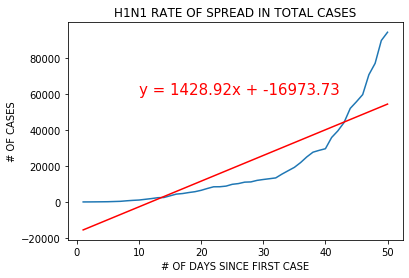

In [21]:
test = grouped_data_df.reset_index()
test["index"] = test["index"] + 1

plt.plot(test["index"], test["Total Cases"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(test["index"], test["Total Cases"])
regress_values = test["index"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(test["index"], regress_values,"r-")
plt.annotate(line_eq,(10,60000),fontsize=15,color="red")
plt.title("H1N1 RATE OF SPREAD IN TOTAL CASES")
plt.xlabel("# OF DAYS SINCE FIRST CASE")
plt.ylabel("# OF CASES")
plt.savefig('output/h1n1_fig5')




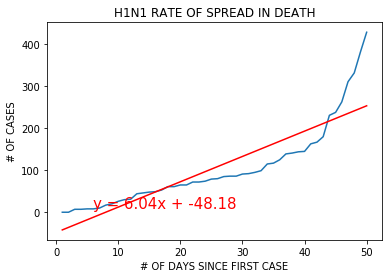

In [21]:
plt.plot(test["index"], test["Total Deaths"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(test["index"], test["Total Deaths"])
regress_values = test["index"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(test["index"], regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("H1N1 RATE OF SPREAD IN DEATH")
plt.xlabel("# OF DAYS SINCE FIRST CASE")
plt.ylabel("# OF CASES")
plt.savefig('output/h1n1_fig6')


# Gmaps

In [22]:
grouped_df = data.groupby("Country").sum()
grouped_df.head()


,Cumulative no. of cases,Cumulative no. of deaths
Country,,
Algeria,19,0
Antigua and Barbuda,12,0
Argentina,14045,175
Australia,39519,39
Austria,173,0


In [23]:
grouped_df['Lat'] = ''
grouped_df['Lng'] = ''
grouped_df.reset_index(inplace=True)
grouped_df

,Country,Cumulative no. of cases,Cumulative no. of deaths,Lat,Lng
0,Algeria,19,0,,
1,Antigua and Barbuda,12,0,,
2,Argentina,14045,175,,
3,Australia,39519,39,,
4,Austria,173,0,,
...,...,...,...,...,...
143,Venezuela,1327,0,,
144,Viet Nam,822,0,,
145,Virgin Islands,1,0,,
146,West Bank and Gaza Strip,146,0,,


In [24]:
# create a params dict that will be updated with new city each iteration
params = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for i,row in grouped_df.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    
    country = row['Country']
    params['address'] = f"{country}"
    try:
        response = requests.get(base_url, params=params).json()    
        grouped_df.loc[i, 'Lat'] = response["results"][0]["geometry"]["location"]["lat"]
        grouped_df.loc[i, 'Lng'] = response["results"][0]["geometry"]["location"]["lng"]

    except:
        print(f"{country} not found. skipping....")
        pass


grouped_df.head(20)

Bermuda, UKOT not found. skipping....
British Virgin Islands,  UKOT not found. skipping....
British Virgin Islands, UKOT not found. skipping....
Cayman Islands, UKOT not found. skipping....
France, French Polynesia, FOC not found. skipping....
France, Martinique, FOC not found. skipping....
France, New Caledonia, FOC not found. skipping....
French Polynesia, FOC not found. skipping....
Guadaloupe, FOC not found. skipping....
Martinique, FOC not found. skipping....
Netherlands, Curacao, OT not found. skipping....
New Caledonia, FOC not found. skipping....
United Kingdom, Isle of Man, Crown Dependency not found. skipping....


,Country,Cumulative no. of cases,Cumulative no. of deaths,Lat,Lng
0,Algeria,19,0,28.0339,1.65963
1,Antigua and Barbuda,12,0,17.0608,-61.7964
2,Argentina,14045,175,-38.4161,-63.6167
3,Australia,39519,39,-25.2744,133.775
4,Austria,173,0,47.5162,14.5501
5,Bahamas,46,0,25.0343,-77.3963
6,Bahrain,139,0,26.0667,50.5577
7,Bangladesh,35,0,23.685,90.3563
8,Barbados,84,0,13.1939,-59.5432
9,Belgium,505,0,50.5039,4.46994


In [25]:
grouped_df['Lat'].replace('',np.nan,inplace = True)
grouped_df = grouped_df.dropna()
grouped_df

,Country,Cumulative no. of cases,Cumulative no. of deaths,Lat,Lng
0,Algeria,19,0,28.033886,1.65963
1,Antigua and Barbuda,12,0,17.060816,-61.7964
2,Argentina,14045,175,-38.416097,-63.6167
3,Australia,39519,39,-25.274398,133.775
4,Austria,173,0,47.516231,14.5501
...,...,...,...,...,...
143,Venezuela,1327,0,6.423750,-66.5897
144,Viet Nam,822,0,14.058324,108.277
145,Virgin Islands,1,0,18.335765,-64.8963
146,West Bank and Gaza Strip,146,0,31.354676,34.3088


In [26]:
locations = grouped_df[["Lat", "Lng"]]

rating = grouped_df["Cumulative no. of cases"]
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations,weights=rating, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig


<Figure size 432x288 with 0 Axes>